<a href="https://www.bharathkreddy.com"><img align="left" src="https://i.imgur.com/axjt3Qe.png" alt="WWW.BHARARTHKREDDY.COM" title="www.bharathkreddy.com"></a>
# [www.bharathkreddy.com](https://www.bharathkreddy.com)

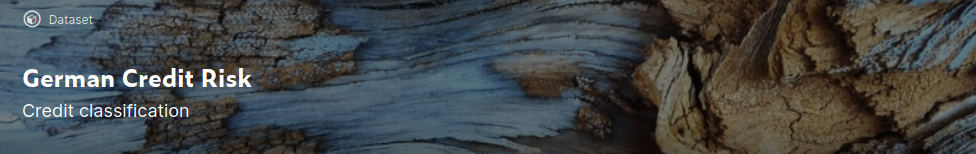

## About the case study

### Context

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, we would used a slightly modified version of this dataset. 

You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

## Import Libraries

In [1]:
import pandas as pd   # For dataframe operations 
import numpy as np    # For array calculations
                             
import matplotlib.pyplot as plt   # Visualization library
%matplotlib inline                
import seaborn as sns            # To render the plots in jupyter notebook
 
from sklearn.model_selection import train_test_split    # To split the dataset into test and train sets.
from sklearn.tree import DecisionTreeClassifier         # To build a Decision tree  
from sklearn import tree                                # To build Random Forests
from sklearn import metrics                             # To measure accuracy scores of moels.

In [2]:
creditData = pd.read_csv("https://raw.githubusercontent.com/bharathkreddy/ML-Bootcamp/master/data/german%20credit.csv")
creditData.head(10) #several missing values!

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
creditData.shape

(1000, 17)

In [4]:
creditData.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
creditData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

### Lets convert the columns with an 'object' datatype into categorical variables

In [6]:
for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [7]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [8]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [9]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["purpose","housing","other_credit","job"]

In [10]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [11]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

## Split Data

In [12]:
X = creditData.drop("default" , axis=1)
y = creditData.pop("default")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [14]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [15]:
y_pred_train = dTree.predict(X_train)
y_pred_test = dTree.predict(X_test)

print(dTree.score(X_train, y_train))
print(metrics.classification_report(y_train,y_pred_train))
print('\n-----------------------------------\n')
print(dTree.score(X_test, y_test))
print(metrics.classification_report(y_test,y_pred_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       214

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


-----------------------------------

0.6933333333333334
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       214
           1       0.47      0.47      0.47        86

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.69      0.69      0.69       300



## Visualizing the Decision Tree

In [16]:
plt.figure(figsize=(150,150))
tree.plot_tree(dTree)

[Text(3242.0256696428573, 7914.176470588235, 'X[0] <= 0.0\ngini = 0.425\nsamples = 700\nvalue = [486, 214]'),
 Text(917.0256696428572, 7434.529411764706, 'X[22] <= 0.5\ngini = 0.221\nsamples = 276\nvalue = [241, 35]'),
 Text(498.2142857142857, 6954.882352941177, 'X[12] <= 0.5\ngini = 0.418\nsamples = 47\nvalue = [33, 14]'),
 Text(265.7142857142857, 6475.235294117647, 'X[8] <= 25.5\ngini = 0.332\nsamples = 38\nvalue = [30, 8]'),
 Text(132.85714285714286, 5995.588235294117, 'X[5] <= 3.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.42857142857143, 5515.941176470588, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(199.28571428571428, 5515.941176470588, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(398.57142857142856, 5995.588235294117, 'X[8] <= 38.5\ngini = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(332.14285714285717, 5515.941176470588, 'X[8] <= 31.5\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(199.28571428571428, 5036.2941176470595, 'X[2] <= 4.5\ngini = 0.133\n

## Reducing over fitting (Regularization)

In [17]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
y_pred_train = dTreeR.predict(X_train)
y_pred_test = dTreeR.predict(X_test)

print(dTreeR.score(X_train, y_train))
print(metrics.classification_report(y_train,y_pred_train))
print('\n-----------------------------------\n')
print(dTreeR.score(X_test, y_test))
print(metrics.classification_report(y_test,y_pred_test))

0.7528571428571429
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       486
           1       0.61      0.54      0.57       214

    accuracy                           0.75       700
   macro avg       0.71      0.69      0.70       700
weighted avg       0.75      0.75      0.75       700


-----------------------------------

0.7433333333333333
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       214
           1       0.56      0.47      0.51        86

    accuracy                           0.74       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.73      0.74      0.74       300



In [18]:
plt.figure(figsize=(150,150))
tree.plot_tree(dTreeR)

[Text(4185.0, 7134.75, 'X[0] <= 0.0\ngini = 0.425\nsamples = 700\nvalue = [486, 214]'),
 Text(2092.5, 5096.25, 'X[22] <= 0.5\ngini = 0.221\nsamples = 276\nvalue = [241, 35]'),
 Text(1046.25, 3057.75, 'X[12] <= 0.5\ngini = 0.418\nsamples = 47\nvalue = [33, 14]'),
 Text(523.125, 1019.25, 'gini = 0.332\nsamples = 38\nvalue = [30, 8]'),
 Text(1569.375, 1019.25, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(3138.75, 3057.75, 'X[2] <= 1.5\ngini = 0.167\nsamples = 229\nvalue = [208, 21]'),
 Text(2615.625, 1019.25, 'gini = 0.021\nsamples = 93\nvalue = [92, 1]'),
 Text(3661.875, 1019.25, 'gini = 0.251\nsamples = 136\nvalue = [116, 20]'),
 Text(6277.5, 5096.25, 'X[1] <= 22.5\ngini = 0.488\nsamples = 424\nvalue = [245, 179]'),
 Text(5231.25, 3057.75, 'X[2] <= 3.5\ngini = 0.44\nsamples = 239\nvalue = [161, 78]'),
 Text(4708.125, 1019.25, 'gini = 0.406\nsamples = 215\nvalue = [154, 61]'),
 Text(5754.375, 1019.25, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(7323.75, 3057.75, 'X[4] <=

In [19]:
dTreeR.feature_importances_

array([0.4925105 , 0.16980638, 0.1661095 , 0.        , 0.06446742,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05112881, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05597739, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [20]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
amount                        0.000000
savings_balance               0.064467
employment_duration           0.000000
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.051129
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
other_credit_bank             0.000000
other_credit_none             0.055977
other_credit_store            0.000000
job_management           

In [23]:
pd.crosstab(y_pred_test,y_test,rownames=['Pred'],colnames=['Actual'])

Actual,0,1
Pred,,
0,183,46
1,31,40


#                             Ensemble Learning - Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [25]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
pd.crosstab(y_predict,y_test,rownames=['Pred'],colnames=['Actual'])

0.7733333333333333


Actual,0,1
Pred,,
0,192,46
1,22,40


# Ensemble Learning - AdaBoosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(base_estimator=dTree,n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

pd.crosstab(y_predict,y_test,rownames=['Pred'],colnames=['Actual'])

0.6866666666666666


Actual,0,1
Pred,,
0,165,45
1,49,41


In [28]:
abcl = AdaBoostClassifier(base_estimator=dTreeR,n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

pd.crosstab(y_predict,y_test,rownames=['Pred'],colnames=['Actual'])

0.74


Actual,0,1
Pred,,
0,196,60
1,18,26


In [29]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [30]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

pd.crosstab(y_predict,y_test,rownames=['Pred'],colnames=['Actual'])

0.74


Actual,0,1
Pred,,
0,196,60
1,18,26


#                     Ensemble Learning - GradientBoost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [32]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
pd.crosstab(y_predict,y_test,rownames=['Pred'],colnames=['Actual'])

0.74


Actual,0,1
Pred,,
0,195,59
1,19,27


# Ensemble RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [34]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
pd.crosstab(y_predict,y_test,rownames=['Pred'],colnames=['Actual'])


0.7766666666666666


Actual,0,1
Pred,,
0,200,53
1,14,33


# END OF NOTEBOOK